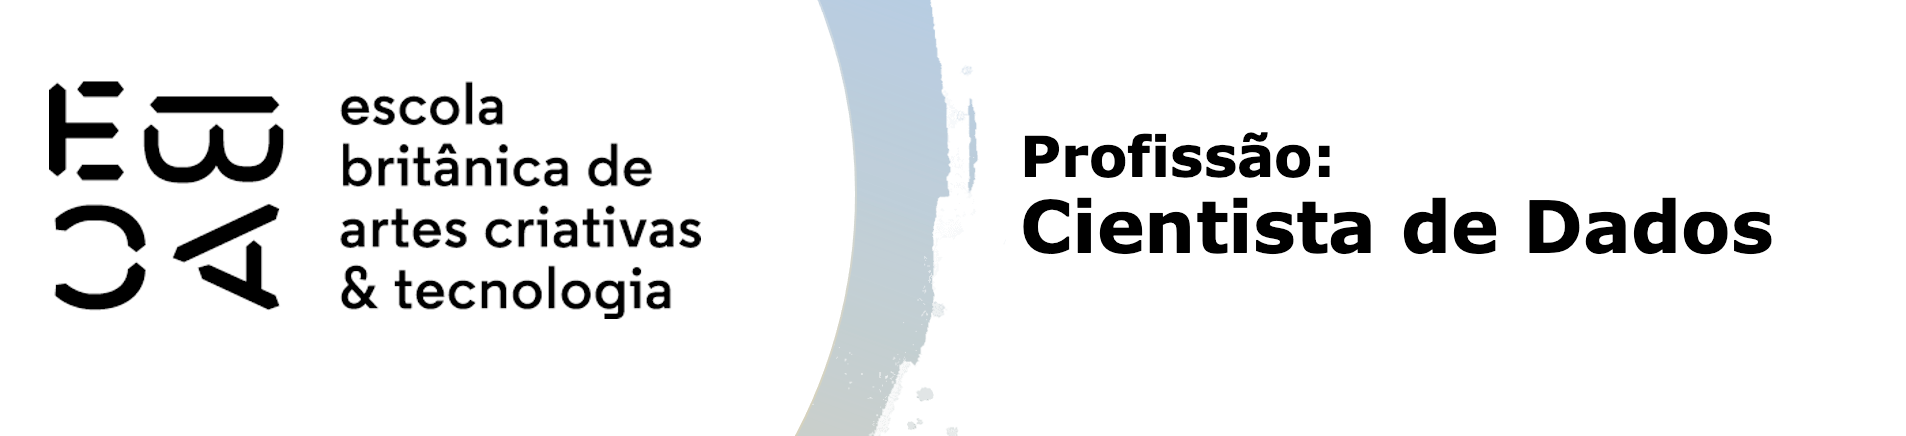

# Regressão III - Tarefa

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./Dados/previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
df.describe()

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,750000.000000,750000.000000,750000.000000,624240.000000,750000.000000,7.500000e+05
mean,8319.025636,0.433267,43.796907,7.746165,2.212315,2.397742e+04
std,4810.382817,0.738516,11.229454,6.684181,0.903041,9.039973e+04
min,0.000000,0.000000,22.000000,0.117808,1.000000,9.530000e+01
25%,4147.000000,0.000000,34.000000,3.049315,2.000000,3.469370e+03
50%,8324.000000,0.000000,43.000000,6.046575,2.000000,7.929980e+03
75%,12490.000000,1.000000,53.000000,10.180822,3.000000,1.864716e+04
max,16649.000000,14.000000,68.000000,42.906849,15.000000,6.802261e+06


In [4]:
df.isnull().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [5]:
df['tempo_emprego'].fillna('7.746165', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          750000 non-null  object 
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 80.1+ MB


In [7]:
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.6,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.30137,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [8]:
df = df.reset_index()
df

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.6,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.30137,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,3.0,2930.40
749996,2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,7.746165,2.0,4084.37
749997,2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,2.0,4339.66
749998,2016-03-01,3024,F,S,S,1,Empresário,Superior completo,União,Casa,28,8.219178,3.0,9159.49


In [9]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_ref               750000 non-null  datetime64[ns]
 1   index                  750000 non-null  int64         
 2   sexo                   750000 non-null  object        
 3   posse_de_veiculo       750000 non-null  object        
 4   posse_de_imovel        750000 non-null  object        
 5   qtd_filhos             750000 non-null  int64         
 6   tipo_renda             750000 non-null  object        
 7   educacao               750000 non-null  object        
 8   estado_civil           750000 non-null  object        
 9   tipo_residencia        750000 non-null  object        
 10  idade                  750000 non-null  int64         
 11  tempo_emprego          750000 non-null  object        
 12  qt_pessoas_residencia  750000 non-null  floa

In [11]:
df['data_ref'].unique()

<DatetimeArray>
['2015-01-01 00:00:00', '2015-02-01 00:00:00', '2015-03-01 00:00:00',
 '2015-04-01 00:00:00', '2015-05-01 00:00:00', '2015-06-01 00:00:00',
 '2015-07-01 00:00:00', '2015-08-01 00:00:00', '2015-09-01 00:00:00',
 '2015-10-01 00:00:00', '2015-11-01 00:00:00', '2015-12-01 00:00:00',
 '2016-01-01 00:00:00', '2016-02-01 00:00:00', '2016-03-01 00:00:00']
Length: 15, dtype: datetime64[ns]

In [12]:
meses_selecao = (df['data_ref'] >= '2016-01-01') & (df['data_ref'] <= '2016-03-01')
df_3meses = df.loc[meses_selecao]

In [13]:
df_3meses['data_ref'].unique()

<DatetimeArray>
['2016-01-01 00:00:00', '2016-02-01 00:00:00', '2016-03-01 00:00:00']
Length: 3, dtype: datetime64[ns]

In [14]:
df_3meses.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
600000,2016-01-01,12946,F,N,S,0,Pensionista,Médio,Casado,Casa,61,7.746165,2.0,2137.61
600001,2016-01-01,8872,F,N,S,2,Servidor público,Superior completo,Casado,Casa,27,9.30137,4.0,13884.35
600002,2016-01-01,16279,F,S,S,3,Assalariado,Médio,Casado,Casa,38,10.967123,5.0,11042.47
600003,2016-01-01,8158,M,S,S,3,Servidor público,Médio,Casado,Casa,35,5.553425,5.0,1333.82
600004,2016-01-01,9356,F,S,N,0,Assalariado,Médio,Viúvo,Casa,63,9.265753,1.0,17633.03


### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [15]:
res = smf.ols('renda ~ tempo_emprego',data=df_3meses).fit()

print(f'R-quadrado: {res.rsquared:.2%}')

R-quadrado: 69.37%


In [16]:
print(f'R-quadrado: {res.rsquared_adj:.2%}')

R-quadrado: 68.75%


In [17]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     110.8
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:08:20   Log-Likelihood:            -1.6371e+06
No. Observations:              150000   AIC:                         3.280e+06
Df Residuals:                  146995   BIC:                         3.310e+06
Df Model:                        3004                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             663.9700   4477.747      0.148      0.882   -8112.325    9440.265
tempo_emprego[T.0.1780821917808219]   878.6590   6172.148      0.142      0.887   -1.12e+04     1.3e+04
tempo_emprego[T.0.1917808219178082]   672.8600   6172.148      0.109      0.913   -1.14e+04    1.28e+04
tempo_emprego[T.0.2]                 1072.9000   4753.083      0.226      0.821   -8243.048    1.04e+04
tempo_emprego[T.0.2164383561643835]   603.9767   7079.940      0.085      0.932   -1.33e+04    1.45e+04
tempo_emprego[T.0.2410958904109589]  -293.0540   6172.148     -0.047      0.962   -1.24e+04    1.18e+04
tempo_emprego[T.0.2438356164383561]  1517.3311   5020.557      0.302      0.762   -8322.860    1.14e+04
tempo_emprego[T.0.2493150684931507]  2076.5373   5105.417      0.407      0.684   -7929.979    1.21e+04
tempo_emprego[T.0.2520547945205479]  1123.8112   5537.602      0.203      0.839   -9729.779     1.2e+04
tempo_emprego[T.0.2547945205479452]   539.2535   4786.913      0.113      0.910   -8843.001    9921.508
tempo_emprego[T.0.2602739726027397]   638.0562   4824.166      0.132      0.895   -8817.213    1.01e+04
tempo_emprego[T.0.2630136986301369]  1063.9964   4711.524      0.226      0.821   -8170.497    1.03e+04
tempo_emprego[T.0.2657534246575342]  1452.9835   4924.102      0.295      0.768   -8198.158    1.11e+04
tempo_emprego[T.0.2712328767123287]   752.0011   4979.855      0.151      0.880   -9008.416    1.05e+04
tempo_emprego[T.0.2767123287671232]   637.7476   4676.854      0.136      0.892   -8528.794    9804.289
tempo_emprego[T.0.2794520547945205]  2092.6978   4693.954      0.446      0.656   -7107.359    1.13e+04
tempo_emprego[T.0.2821917808219178]   246.0200   7079.940      0.035      0.972   -1.36e+04    1.41e+04
tempo_emprego[T.0.284931506849315]   1192.5326   4791.736      0.249      0.803   -8199.175    1.06e+04
tempo_emprego[T.0.2876712328767123]   457.8670   4924.102      0.093      0.926   -9193.274    1.01e+04
tempo_emprego[T.0.2931506849315068]   426.1245   5125.690      0.083      0.934   -9620.126    1.05e+04
tempo_emprego[T.0.2958904109589041]  1343.8773   4561.975      0.295      0.768   -7597.504    1.03e+04
tempo_emprego[T.0.2986301369863013]   533.5557   4824.166      0.111      0.912   -8921.713    9988.825
tempo_emprego[T.0.3013698630136986]  1070.4633   4782.236      0.224      0.823   -8302.624    1.04e+04
tempo_emprego[T.0.3178082191780822]  -298.3592   5825.044     -0.051      0.959   -1.17e+04    1.11e+04
tempo_emprego[T.0.3205479452054794]   855.9269   4905.126      0.174      0.861   -8758.023    1.05e+04
tempo_emprego[T.0.3232876712328767]   401.5460   4924.102      0.082      0.935   -9249.595    1.01e+04
tempo_emprego[T.0.3260273972602739]  1399.2526   5281.662      0.26

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [18]:
df_3meses['tempo_emprego']=df_3meses.tempo_emprego.astype(float)

In [19]:
df_3meses['tempo_emprego_cat'], quebras = pd.qcut(df_3meses.tempo_emprego, 20, duplicates='drop', retbins=True)

In [20]:
renda_med = pd.DataFrame()
renda_med['renda'] = df_3meses.groupby('tempo_emprego_cat')['renda'].mean()
renda_med['renda_min'] = renda_med.renda - 2*df_3meses.groupby('tempo_emprego_cat')['renda'].sem()
renda_med['renda_max'] = renda_med.renda + 2*df_3meses.groupby('tempo_emprego_cat')['renda'].sem()
renda_med['log_renda'] = np.log(renda_med.renda)
renda_med['log_renda_med'] = renda_med.groupby('tempo_emprego_cat')['log_renda'].mean()
renda_med['tempo_emprego_med'] = df_3meses.groupby('tempo_emprego_cat')['tempo_emprego'].mean()

In [21]:
renda_med.rename(columns={'renda':'renda_med'}, inplace=True)
# y_med.columns = []

In [22]:
tab = df_3meses.merge(renda_med, on='tempo_emprego_cat', how='left')
tab

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,...,tempo_emprego,qt_pessoas_residencia,renda,tempo_emprego_cat,renda_med,renda_min,renda_max,log_renda,log_renda_med,tempo_emprego_med
0,2016-01-01,12946,F,N,S,0,Pensionista,Médio,Casado,Casa,...,7.746165,2.0,2137.61,"(7.474, 7.746]",3392.483730,3359.067321,3425.900138,8.129318,8.129318,7.735452
1,2016-01-01,8872,F,N,S,2,Servidor público,Superior completo,Casado,Casa,...,9.301370,4.0,13884.35,"(9.101, 10.471]",6041.105462,5922.026824,6160.184100,8.706342,8.706342,9.763741
2,2016-01-01,16279,F,S,S,3,Assalariado,Médio,Casado,Casa,...,10.967123,5.0,11042.47,"(10.471, 12.474]",7025.945269,6901.317146,7150.573393,8.857365,8.857365,11.396944
3,2016-01-01,8158,M,S,S,3,Servidor público,Médio,Casado,Casa,...,5.553425,5.0,1333.82,"(4.945, 5.759]",3398.775862,3329.816400,3467.735325,8.131171,8.131171,5.370319
4,2016-01-01,9356,F,S,N,0,Assalariado,Médio,Viúvo,Casa,...,9.265753,1.0,17633.03,"(9.101, 10.471]",6041.105462,5922.026824,6160.184100,8.706342,8.706342,9.763741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,...,8.665753,3.0,2930.40,"(8.129, 9.101]",5054.059829,4953.662972,5154.456687,8.527947,8.527947,8.598975
149996,2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,...,7.746165,2.0,4084.37,"(7.474, 7.746]",3392.483730,3359.067321,3425.900138,8.129318,8.129318,7.735452
149997,2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,...,10.969863,2.0,4339.66,"(10.471, 12.474]",7025.945269,6901.317146,7150.573393,8.857365,8.857365,11.396944
149998,2016-03-01,3024,F,S,S,1,Empresário,Superior completo,União,Casa,...,8.219178,3.0,9159.49,"(8.129, 9.101]",5054.059829,4953.662972,5154.456687,8.527947,8.527947,8.598975


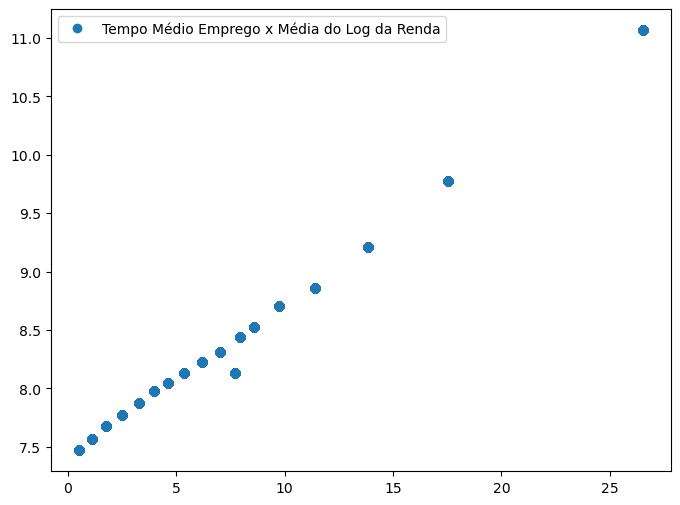

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(tab.tempo_emprego_med, tab.log_renda, "o", label="Tempo Médio Emprego x Média do Log da Renda")
ax.legend()

### O gráfico se assemelha com o gráfico da regressão segmentada.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


## Linearização com muitas observações e Transformação em X:

In [24]:
df_3meses['renda_med'] = df_3meses.groupby('tempo_emprego_cat')['renda'].mean()

<Axes: xlabel='tempo_emprego', ylabel='renda'>

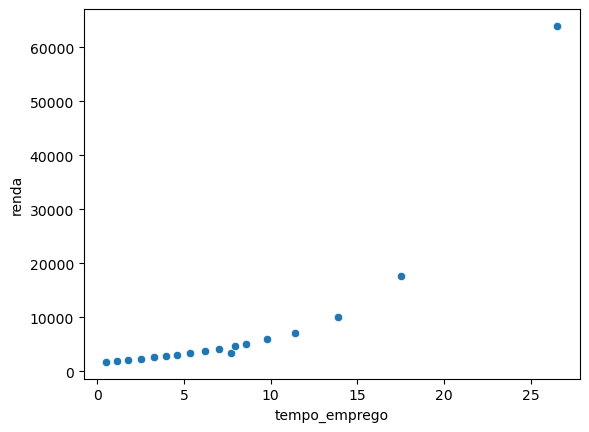

In [30]:
df_3meses['grupos'], _ = pd.qcut(df_3meses['tempo_emprego'], 20,  duplicates='drop', retbins=True)

tab_2 = df_3meses.groupby('grupos')['renda'].describe()
tab_2['tempo_emprego'] = df_3meses.groupby('grupos')['tempo_emprego'].mean()
tab_2['renda_med'] = df_3meses.groupby('grupos')['renda_med'].mean()

tab_2.rename(columns={'mean':'renda'}, inplace=True)

sns.scatterplot(data=tab_2, x = 'tempo_emprego', y = 'renda')

In [31]:
def esp_vs_obs(data=df_3meses):
    pred_ols = res.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    
    m_l = pred_ols.summary_frame()["mean_ci_lower"]
    m_u = pred_ols.summary_frame()["mean_ci_upper"]

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(data.tempo_emprego, data.renda, "o", label="Dados observados")
    ax.plot(data.tempo_emprego, data.renda_med, "b-", label="Média da simulação")
    ax.plot(data.tempo_emprego, res.fittedvalues, "r--.", label="Estimativa OLS")
    ax.plot(data.tempo_emprego, iv_u, "r--", label = 'Banda de confiança para renda')
    ax.plot(data.tempo_emprego, iv_l, "r--")
    ax.plot(data.tempo_emprego, m_u, "g:", label='Banda de confiança para a média')
    ax.plot(data.tempo_emprego, m_l, "g:")
    ax.legend(loc="best")
    plt.show

R-quadrado: 94.82%


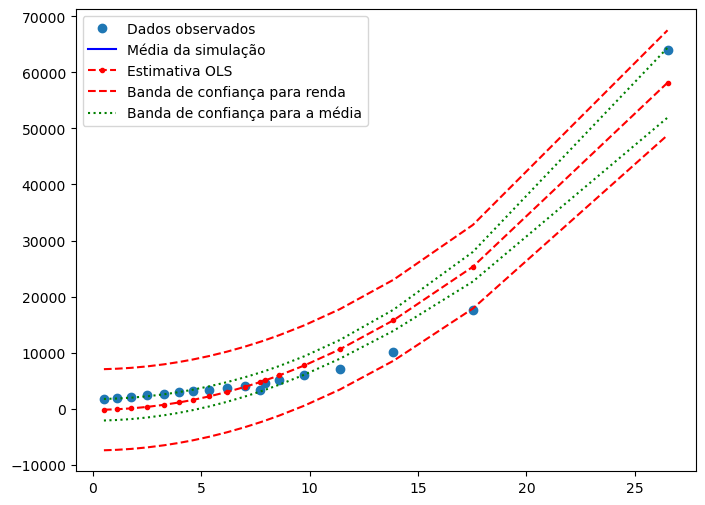

In [32]:
res = smf.ols('renda ~ I(tempo_emprego**2)',data=tab_2).fit()
print(f'R-quadrado: {res.rsquared_adj:.2%}')
esp_vs_obs(data=tab_2)

### Regressão segmentada:

R-quadrado: 30.57%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                 6.604e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:08:25   Log-Likelihood:            -1.6985e+06
No. Observations:              150000   AIC:                         3.397e+06
Df Residuals:                  149998   BIC:                         3.397e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -9313.1078     83.602   -111.398      0.000   -9476.967   -9149.249
tempo_emprego_1  2178.8028      8.478    256.991      0.000    2162.186    2195.420
tempo_emprego_2          0          0        nan        nan           0           0
==============================================================================
Omnibus:                   308752.272   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1599323498.275
Skew:                          17.350   Prob(JB):                         0.00
Kurtosis:                     507.666   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

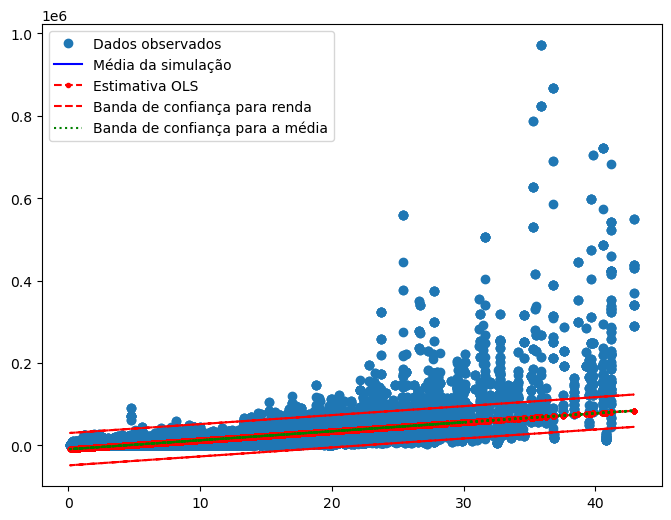

In [29]:
C1=43

df_3meses['tempo_emprego_1'] = (df_3meses.tempo_emprego<=C1)*df_3meses.tempo_emprego + (df_3meses.tempo_emprego>C1)*C1
df_3meses['tempo_emprego_2'] = (df_3meses.tempo_emprego<=C1)*0 + (df_3meses.tempo_emprego>C1)*(df_3meses.tempo_emprego-C1)

#res = sm.OLS(y, x).fit()
res = smf.ols('renda ~ tempo_emprego_1 + tempo_emprego_2',data=df_3meses).fit()

print(f'R-quadrado: {res.rsquared:.2%}')
esp_vs_obs();
res.summary()

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

#### Ao realizar as análises com duas técnicas diferentes, pode-se perceber que, nesse caso, Linearização com muitas observações e Transformação em X apresentou um R² ajustado de 94.82%, contra 30.57% na regressão segmentada.